<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/3montecarlosimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

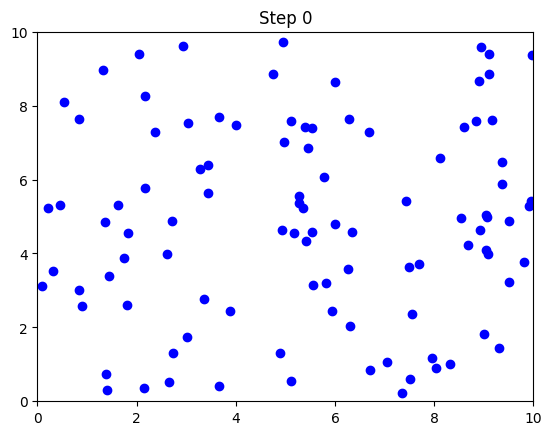

<ipython-input-1-d1bbffddccb6>:23: RuntimeWarning: divide by zero encountered in scalar divide
  return 24 * epsilon * (2 * (sigma / r)**12 - (sigma / r)**6) / r
<ipython-input-1-d1bbffddccb6>:23: RuntimeWarning: invalid value encountered in scalar subtract
  return 24 * epsilon * (2 * (sigma / r)**12 - (sigma / r)**6) / r


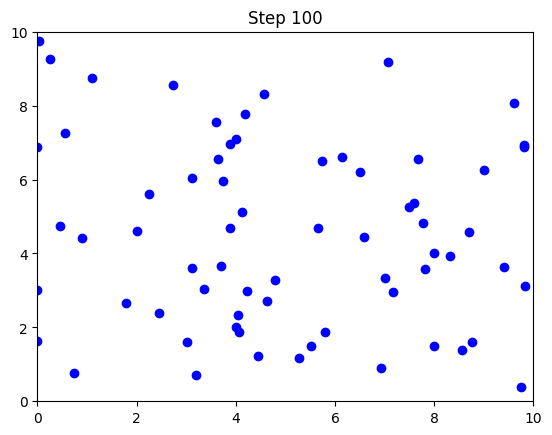

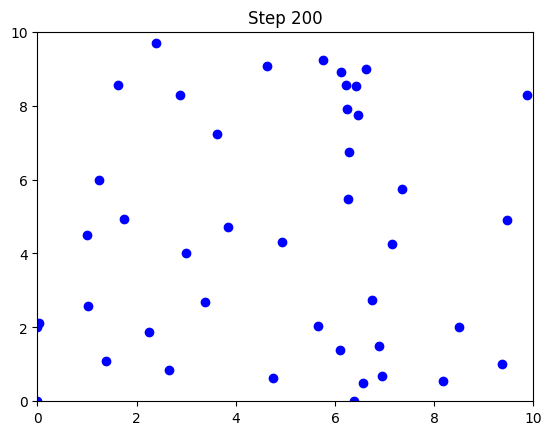

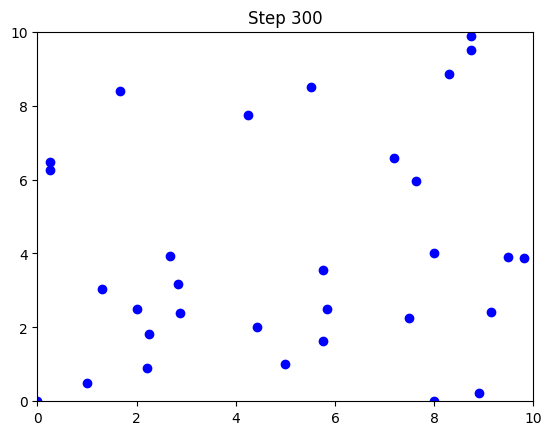

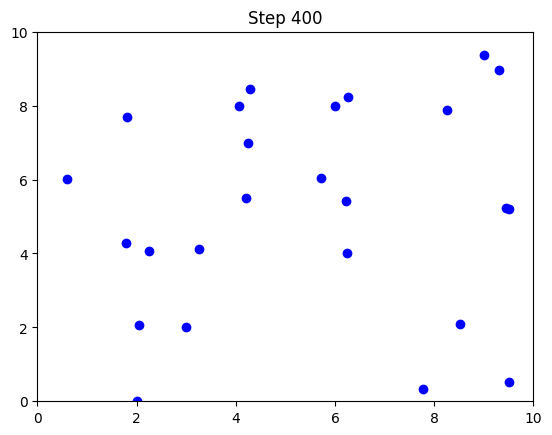

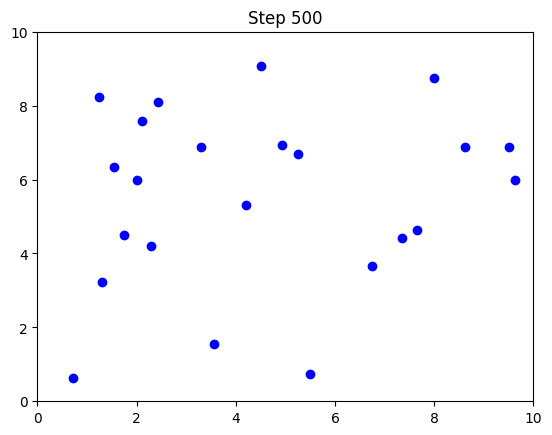

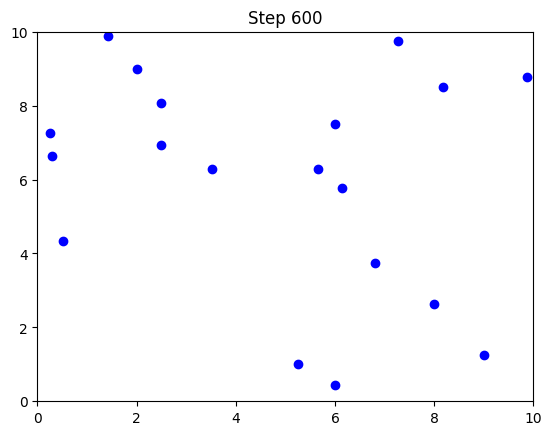

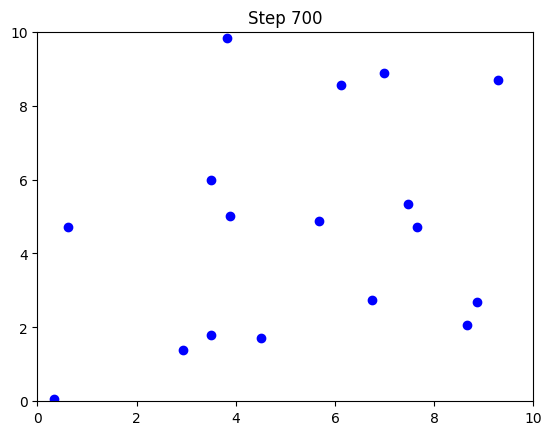

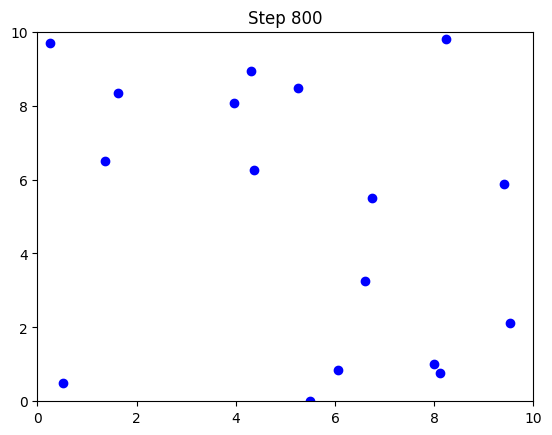

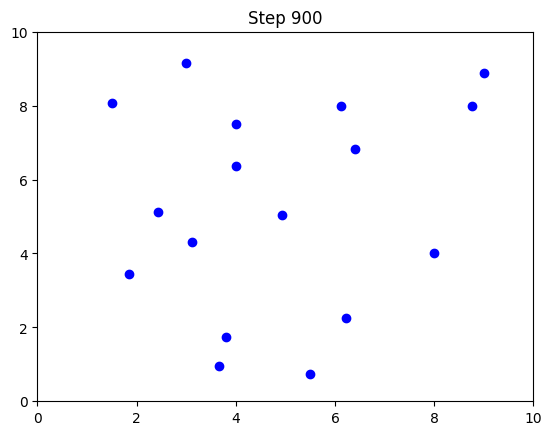

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
N = 100  # Number of particles
L = 10  # Size of the simulation box (L x L)
T = 0.8  # Temperature
epsilon = 1.0  # Depth of the potential well
sigma = 1.0  # Distance at which potential is 0
mass = 1.0  # Mass of the particle
dt = 0.01  # Time step
steps = 1000  # Number of steps to run the simulation
rho = N / (L**2)  # Density of particles

# Functions for Lennard-Jones Potential and Force Calculation
def lj_potential(r):
    """Calculate Lennard-Jones potential."""
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def lj_force(r):
    """Calculate Lennard-Jones force."""
    return 24 * epsilon * (2 * (sigma / r)**12 - (sigma / r)**6) / r

def wrap_positions(x, L):
    """Apply periodic boundary conditions."""
    return x % L

def init_positions(N, L):
    """Initialize random positions of particles."""
    return np.random.rand(N, 2) * L

def init_velocities(N, T):
    """Initialize velocities with Maxwell-Boltzmann distribution."""
    velocities = np.random.randn(N, 2)  # Gaussian distribution
    velocity_scale = np.sqrt(T)  # Scale to temperature
    return velocities * velocity_scale

def compute_forces(positions, L):
    """Compute the forces on each particle."""
    forces = np.zeros_like(positions)
    for i in range(N):
        for j in range(i+1, N):
            r_vec = positions[j] - positions[i]
            r_vec -= np.round(r_vec / L) * L  # Apply periodic boundary conditions
            r = np.linalg.norm(r_vec)
            if r < 2.5 * sigma:  # Only compute force if within cutoff
                f = lj_force(r) * r_vec / r
                forces[i] += f
                forces[j] -= f
    return forces

# Initialize positions and velocities
positions = init_positions(N, L)
velocities = init_velocities(N, T)

# Simulation loop
for step in range(steps):
    forces = compute_forces(positions, L)

    # Update positions and velocities using Velocity Verlet algorithm
    velocities += 0.5 * forces * dt / mass
    positions += velocities * dt
    positions = np.array([wrap_positions(x, L) for x in positions])  # Apply periodic boundary conditions
    forces = compute_forces(positions, L)  # Recompute forces after position update
    velocities += 0.5 * forces * dt / mass  # Update velocities

    # Visualization every 100 steps
    if step % 100 == 0:
        plt.clf()
        plt.scatter(positions[:, 0], positions[:, 1], c='blue', marker='o')
        plt.xlim(0, L)
        plt.ylim(0, L)
        plt.title(f"Step {step}")
        plt.pause(0.05)

# Plot final configuration
plt.show()
